# [Validation] Data Analytics Test - iFood
###### [By Israel Mendes](https://github.com/israelmendez232)

This notebook were generated by [Databricks](https://databricks.com/). The idea is to replicate more possible of the enviroment of the Data Analytics from iFood. Steps:
1. Data Integrity
2. Outliers
3. QQ Plot
4. Normality Tests
5. The End

## 1. Data Integrity
To make sure the data received has no missing information.

In [0]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
df_spark = spark.read.csv("/FileStore/tables/ml_project1_data-1.csv", header="true", inferSchema="true") 

df = df_spark.toPandas()

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 2240 non-null int32 
 1 Year_Birth 2240 non-null int32 
 2 Education 2240 non-null object 
 3 Marital_Status 2240 non-null object 
 4 Income 2216 non-null float64
 5 Kidhome 2240 non-null int32 
 6 Teenhome 2240 non-null int32 
 7 Dt_Customer 2240 non-null object 
 8 Recency 2240 non-null int32 
 9 MntWines 2240 non-null int32 
 10 MntFruits 2240 non-null int32 
 11 MntMeatProducts 2240 non-null int32 
 12 MntFishProducts 2240 non-null int32 
 13 MntSweetProducts 2240 non-null int32 
 14 MntGoldProds 2240 non-null int32 
 15 NumDealsPurchases 2240 non-null int32 
 16 NumWebPurchases 2240 non-null int32 
 17 NumCatalogPurchases 2240 non-null int32 
 18 NumStorePurchases 2240 non-null int32 
 19 NumWebVisitsMonth 2240 non-null int32 
 20 AcceptedCmp3 2240 non-null int32 
 21 AcceptedCmp4 2240 non-null int32 
 22 AcceptedCmp5 2240 non-null int32 
 23 AcceptedCmp1 2240 non-null int32 
 24 AcceptedCmp2 2240 non-null int32 
 25 Complain 2240 non-null int32 
 26 Z_CostContact 2240 non-null int32 
 27 Z_Revenue 2240 non-null int32 
 28 Response 2240 non-null int32 
dtypes: float64(1), int32(25), object(3)
memory usage: 288.9+ KB

In [0]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


From the **validation** is possible to notice a few problems:

- `Year_Birth:` Is possible to notice the lowest age in the dataset is 1893 and the oldest is 1996. I would check it again the source because the range is to wait to make sense. Especially while doublechecking with `Dt_Customer`;
- `Income:` Is missing 24 responses. While the whole dataset is 2.240 rows long, the NULL values compose of 1.07% of the table. Which makes sense to drop that rows to avoid further problems with the EDA;
- `Marital_Status:` A few responses are way outside of the expected, such as _Absurd_ and _YOLO_;
- `Z_CostContact and Z_Revenue:` Has - exactly - the same element, the first one is _3_ and the second is _11_.

In [0]:
temp_table_name = "ml_project1_data"
df_spark.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

SELECT Income
FROM `ml_project1_data`
WHERE Income IS NULL
ORDER BY Income

Income
null
null
null
null
null
null
null
null
null
null


Now it's time to understand better the distinct values for the categorical variables.

In [0]:
%sql

SELECT DISTINCT Education
FROM `ml_project1_data`
ORDER BY Education

Education
2n Cycle
Basic
Graduation
Master
PhD


In [0]:
%sql

SELECT DISTINCT Marital_Status
FROM `ml_project1_data`
ORDER BY Marital_Status

Marital_Status
Absurd
Alone
Divorced
Married
Single
Together
Widow
YOLO


To make sure that there isn't any duplicate in the dataset.

In [0]:
%sql

SELECT 
  "Count" AS metric
  , COUNT(ID) AS count_customers
FROM `ml_project1_data`

UNION ALL 

SELECT 
  "Count Distinct" AS metric
  , COUNT(DISTINCT ID) AS count_customers
FROM `ml_project1_data`

metric,count_customers
Count,2240
Count Distinct,2240


Excluding the NULL or NaN values

In [0]:
df_trans = df.dropna(axis = 0, how = "any")
df_trans.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


Counting if there is any NULL in the dataframe yet.

In [0]:
df_trans.isnull().sum()

Out[36]: ID 0
Year_Birth 0
Education 0
Marital_Status 0
Income 0
Kidhome 0
Teenhome 0
Dt_Customer 0
Recency 0
MntWines 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
MntGoldProds 0
NumDealsPurchases 0
NumWebPurchases 0
NumCatalogPurchases 0
NumStorePurchases 0
NumWebVisitsMonth 0
AcceptedCmp3 0
AcceptedCmp4 0
AcceptedCmp5 0
AcceptedCmp1 0
AcceptedCmp2 0
Complain 0
Z_CostContact 0
Z_Revenue 0
Response 0
dtype: int64

## 2. Outliers
Checking if the data doesn't have any outliers to affect the model or the analysis.

In [0]:
df_trans.shape

Out[37]: (2216, 29)

In [0]:
Q1 = df_trans.quantile(0.25)
Q3 = df_trans.quantile(0.75)
IQR  = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_trans_outliers = df_trans[~( (df_trans < lower) | (df_trans > upper) ).any(axis=1)]

df_trans_outliers.shape

Out[38]: (1182, 29)

In [0]:
df_trans_outliers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0


There is 53.33% of the current dataset being the outlier. To explore more this:

In [0]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 2216 non-null int32 
 1 Year_Birth 2216 non-null int32 
 2 Education 2216 non-null object 
 3 Marital_Status 2216 non-null object 
 4 Income 2216 non-null float64
 5 Kidhome 2216 non-null int32 
 6 Teenhome 2216 non-null int32 
 7 Dt_Customer 2216 non-null object 
 8 Recency 2216 non-null int32 
 9 MntWines 2216 non-null int32 
 10 MntFruits 2216 non-null int32 
 11 MntMeatProducts 2216 non-null int32 
 12 MntFishProducts 2216 non-null int32 
 13 MntSweetProducts 2216 non-null int32 
 14 MntGoldProds 2216 non-null int32 
 15 NumDealsPurchases 2216 non-null int32 
 16 NumWebPurchases 2216 non-null int32 
 17 NumCatalogPurchases 2216 non-null int32 
 18 NumStorePurchases 2216 non-null int32 
 19 NumWebVisitsMonth 2216 non-null int32 
 20 AcceptedCmp3 2216 non-null int32 
 21 AcceptedCmp4 2216 non-null int32 
 22 AcceptedCmp5 2216 non-null int32 
 23 AcceptedCmp1 2216 non-null int32 
 24 AcceptedCmp2 2216 non-null int32 
 25 Complain 2216 non-null int32 
 26 Z_CostContact 2216 non-null int32 
 27 Z_Revenue 2216 non-null int32 
 28 Response 2216 non-null int32 
dtypes: float64(1), int32(25), object(3)
memory usage: 303.0+ KB

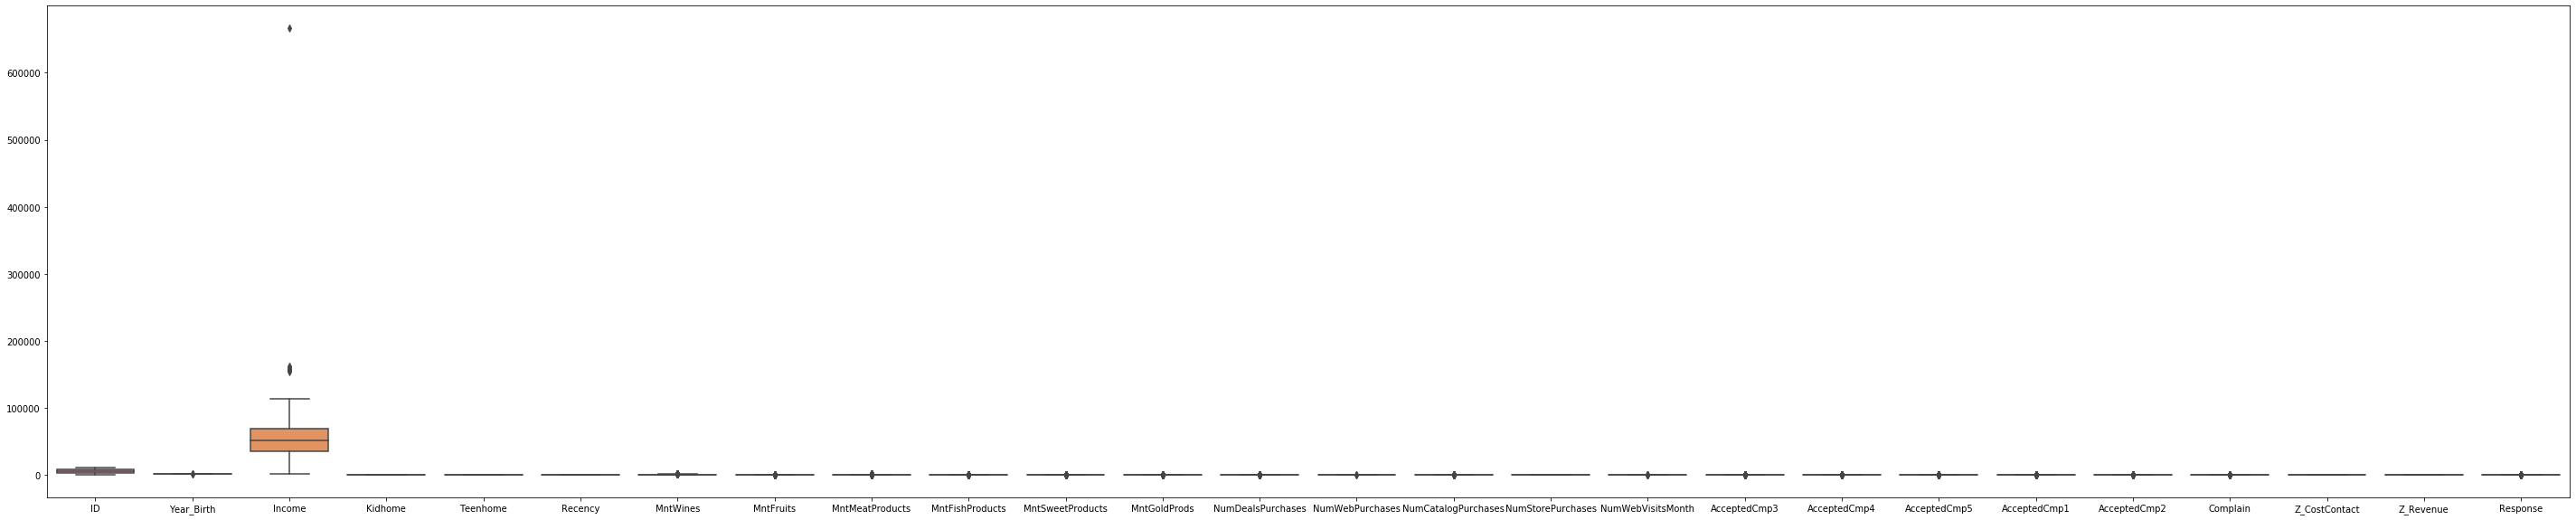

In [0]:
fig, ax = plt.subplots(figsize = (50, 10))
sns.boxplot(ax = ax, data = df_trans, orient = "v")

plt.show()

#### Conclusion - Outliers
While there is a significant number of outliers, it's ideal to maintain it since the data is fairly small to determine for sure the outliers and to remove those.

## 3. QQ Plot
The Quantile-Quantile Plot (QQ Plot) process is ideal to visualize if the sample data have a good distribution. It will provide a more different way to understand the data.

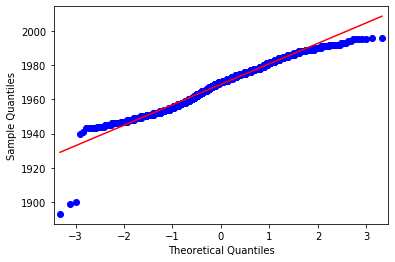

In [0]:
qqplot(df_trans["Year_Birth"], line='s')

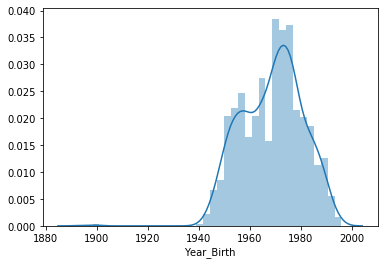

In [0]:
sns.distplot(df_trans["Year_Birth"])

In [0]:
%sql

SELECT 
  COUNT(DISTINCT ID) AS users
  , CASE WHEN Year_Birth >= 1940 THEN '1940 - TODAY' ELSE '1880 - 1939' END AS year_group
FROM `ml_project1_data`
WHERE Income IS NOT NULL
GROUP BY year_group
ORDER BY users DESC

users,year_group
2213,1940 - TODAY
3,1880 - 1939


While the year birth is between 1880 and 1939, this represents 0.13% of the current dataset. Which makes sense to "eliminate" those elements.

In [0]:
df_trans_outliers = df_trans['Year_Birth'] >= 1940
df_trans_outliers = df_trans[df_trans_outliers]

df_trans_outliers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


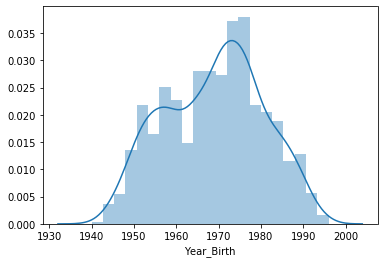

In [0]:
sns.distplot(df_trans_outliers["Year_Birth"])

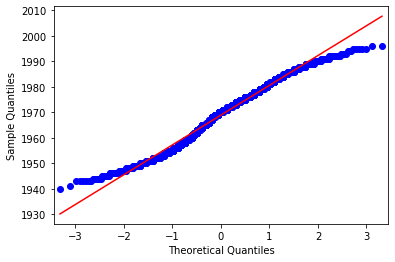

In [0]:
qqplot(df_trans_outliers["Year_Birth"], line='s')

#### Conclusion - QQ Plot
When using a normal variable (in this case, the `Year_Birth`), it's possible to notice a problem with users with lower age from 1940. After exploring the data, it made sense to eliminate these "outliers" to provide better accuracy for the model.

## 4. Normality Tests
Provide a statistical solution to understand if the samples have the right distribution and it's Gaussian (being the H0). It's going to use this type of tests:

- [Shapiro-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html): This test will prove if the sample was drawn from a normal distribution;
- [D’Agostino and Pearson’s Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html?): This tests also explore if the sample comes from a normal distribution.

In [0]:
statistic, p_value = shapiro(df_trans_outliers["Year_Birth"])
print(f"Statistics: {statistic}, p-value = {p_value}")

alpha = 0.05
if p_value > alpha:
	print("Accepts H0")
else:
	print("Rejects H0!")

Statistics: 0.983243465423584, p-value = 1.814682327406429e-15
Rejects H0!

In [0]:
statistic, p_value = normaltest(df_trans_outliers["Year_Birth"])
print(f"Statistics: {statistic}, p-value = {p_value}")

alpha = 0.05
if p_value > alpha:
	print("Accepts H0")
else:
	print("Rejects H0!")

Statistics: 184.44484768452398, p-value = 8.877899360290813e-41
Rejects H0!

In [0]:
df_trans_outliers.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


#### Conclusion - Normality Test
After the adjustments, is possible to notice that the sample failed in both tests. This implies that **the distribution is non-normal**. Which will affect a lot to produce the machine learning model.

--- 

## 5. The End
Saving the file for further studies

In [0]:
df = spark.createDataFrame(df_trans_outliers)
df.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("dbfs:/FileStore/df/data_analytics_cleaned.csv")

### Conclusion - Validation
It's possible to notice some "problems" with the data. Some of the missing elements (in `Income`) or the "outliers" (in `Year_Birth`). It's been used the best to clean and validate the data as possible. But the dataset doesn't have a normal distribution.

Cardinality and others data treatements will be used on the predictive model notebook.